In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from matplotlib import image
import scipy


## Exercice 1

## 1)

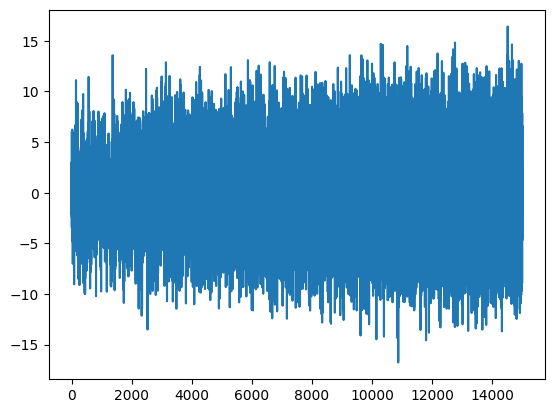

In [4]:
s=np.fromfile('signal_enregistre.dat')
plt.plot(s)

## 2)

Text(0.5, 1.0, 'spectogramme')

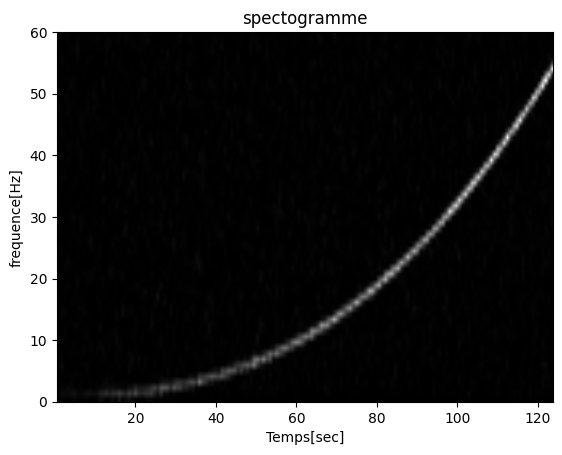

In [6]:
largeur=128
fs=120
noverlap=largeur//4
window=scipy.signal.windows.hamming(largeur)
f,t,sxx=scipy.signal.spectrogram(s,fs=fs,window=window,noverlap=noverlap)
plt.imshow(sxx,extent=[t[0],t[-1],f[-1],f[0]],cmap='gray',interpolation='bilinear',aspect='auto')
plt.gca().invert_yaxis()
plt.ylabel('frequence[Hz]')
plt.xlabel('Temps[sec]')
plt.title('spectogramme')

## 3)

Text(0, 0.5, 'Fréquence [Hz]')

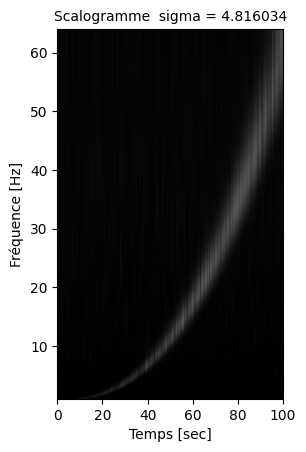

In [10]:
wt = "cmor2-1"
size=5
sigma=np.std(s)
freq_ech=128

fc = pywt.central_frequency(wt)

fq_max = freq_ech//2
fq_min = (fc*freq_ech)/len(s)
fq_min = max(1, fq_min)

nbfq = 200
fq = np.linspace(fq_min, fq_max, nbfq)
scales = (fc*freq_ech)/fq


nbfq = 200
#fq = np.linspace(fq_min, fq_max, nbfq)
#scales = (fc*largeur)/f

coeff, fq = pywt.cwt(s, scales, wt, sampling_period = 1/largeur)
for i in range(len(scales)) :
    coeff[i] = coeff[i]/(scales[i]/largeur)**0.5
coeff2 = abs(coeff)**2
plt.subplot(1,2,2)
plt.imshow(coeff2,extent = [0,100,fq[-1], fq[0]],cmap='gray', interpolation= 'bilinear', aspect= 'auto')
plt.gca().invert_yaxis()
plt.title("Scalogramme  sigma = {:2f}".format(sigma), fontsize = size*2)
plt.xlabel("Temps [sec]",fontsize = size*2)
plt.ylabel("Fréquence [Hz]",fontsize = size*2)

## 4)
Avec le spectogramme on voit que 

## 5)

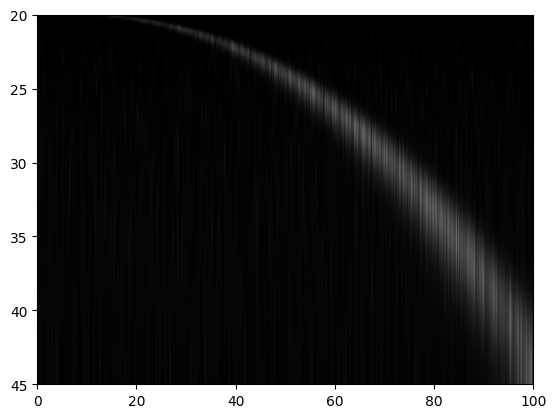

In [13]:
plt.imshow(coeff2,extent = [0,100,45, 20],cmap='gray', interpolation= 'bilinear', aspect= 'auto')

## 6)

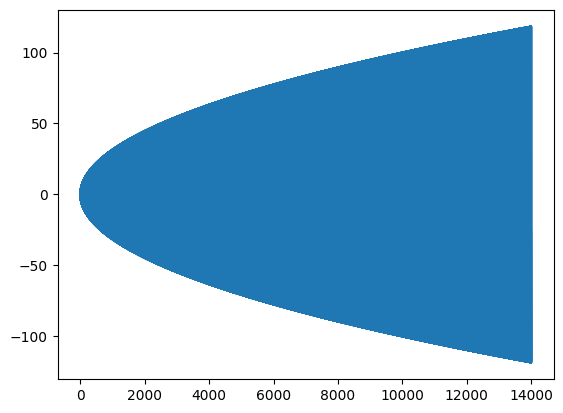

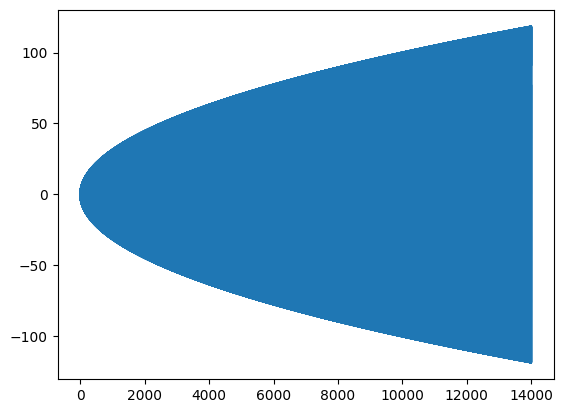

In [21]:
f_t=np.sqrt(t+3)*np.cos(0.014*t**3.5+10*t+np.pi/4)
g_t=np.sqrt(t+3)*np.cos(21*t**1.8+10*t+np.pi/4)
t=np.arange(0,14000,1/120)
plt.figure()
plt.plot(t,f_t)
plt.figure()
plt.plot(t,g_t)

## Exercice 3

## 1)

In [25]:
y=s[0:1024]
def denoising(datab,wt,level,rho):
    level=min(level,pywt.dwt_max_level(len(datab),wt.dec_len))
    coeffs=pywt.wavedec(datab,wt,level=level)
    coeffs_w=coeffs[1:]
    co=np.concatenate(coeffs_w)
    sig=np.median(np.abs(co))/0.6745
    T=sig*np.sqrt(2*np.log(co.size))*rho
    for i in range(1,level+1):
        coeffs[i]=pywt.threshold(coeffs[i],value=T,mode='soft')
    res=pywt.waverec(coeffs,wt)
    return (res,sig,T)
wt=pywt.Wavelet('sym4')
(res,sig,T) = denoising(y,wt,4,0.4)

## 2)

In [29]:
def SNR(data,datab):
    d=data.ravel()
    db=datab.ravel()
    b=db-d
    d_energy=np.abs(d**2).sum()
    b_energy=np.abs(b**2).sum()
    snr=10*np.log10(d_energy/b_energy)
    return snr

print(SNR(y,f_t[0:1024]))
SNR(y,g_t[0:1024])

-0.9818215437044792


-1.241346580506847

## 3)
f_t semble être le modèle le plus adapté car donnant un snr plus proche de zéro